  logical

   1

  logical

   1

  logical

   1

  logical

   1

  logical

   1



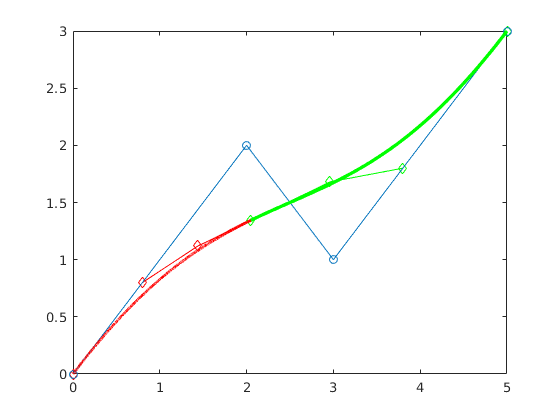

In [4]:
clear;
a = 0; b = 5; n = 3; u_star = 2;
precision = 0.0001;
u = a:precision:b;
u_1 = a:precision:u_star;
u_2 = u_star:precision:b;
r_u = (u-a)./(b-a);
r_u_1 = (u_1-a)./(b-a);
r_u_2 = (u_2-a)./(b-a);
r_u_star = (u_star - a) / (b - a); 

x_p = [0, 2, 3, 5];
y_p = [0, 2, 1, 3];

[m_x, m_y] = de_casteljau(n, x_p, y_p, r_u_star);
c1_x = diag(m_x)';
c1_y = diag(m_y)';
c2_x = m_x(n+1, :);
c2_y = m_y(n+1, :);
p_x = zeros(1, length(u));
p_y = zeros(1, length(u));
p1_x = zeros(1, length(u_1));
p1_y = zeros(1, length(u_1));
p2_x = zeros(1, length(u_2));
p2_y = zeros(1, length(u_2));
for i = 1:length(u)
    [t_x, t_y] = de_casteljau(n, x_p, y_p, r_u(i)); %original bezier curve
    p_x(i) = t_x(n+1, n+1); 
    p_y(i) = t_y(n+1, n+1);
end
for i = 1:length(u_1)
    %first piece of splitted bezier curve
    new_u = r_u_1(i)/r_u_star;
    [t_x, t_y] = de_casteljau(n, c1_x, c1_y, new_u); 
    p1_x(i) = t_x(n+1, n+1); 
    p1_y(i) = t_y(n+1, n+1);
end
for i = 1:length(u_2)
    %second piece of splitted bezier curve
    new_u = (r_u_2(i)-r_u_star)/(1-r_u_star);
    [t_x, t_y] = de_casteljau(n, c2_x, c2_y, new_u); 
    p2_x(i) = t_x(n+1, n+1); 
    p2_y(i) = t_y(n+1, n+1);
end
%plot(p_x, p_y, 'b', 'linewidth', 2); hold on; %original curve
plot(c1_x, c1_y, '-rd', 'MarkerSize',6); hold on; %points of first curve
plot(c2_x, c2_y, '-gd', 'MarkerSize',6); hold on; %points of second curve
plot(x_p, y_p, '-O'); hold on; % original points
plot(p1_x, p1_y, 'r', 'linewidth', 2.5); hold on; % first curve
plot(p2_x, p2_y, 'g', 'linewidth', 2.5); hold on; % second curve
display(and( c1_x(end) == c2_x(end), c1_y(end) == c2_y(end) )) %c0 continuity
h1 = (u_star-a);
h2 = (b-u_star);
display( c1_x(end) == ((h1 / (h1+h2))*c2_x(end-1)) + ((h2 / (h1+h2))*c1_x(end-1))) ; %c1 continuity 
display( c1_y(end) == ((h1 / (h1+h2))*c2_y(end-1)) + ((h2 / (h1+h2))*c1_y(end-1))) ; %c1 continuity
first_continuity_c2x = (c1_x(end-1)+((h2/h1)*(c1_x(end-1)-c1_x(end-2))));
second_continuity_c2x = (c2_x(end-1)+((h1/h2)*(c2_x(end-1)-c2_x(end-2))));
display( first_continuity_c2x == second_continuity_c2x);
first_continuity_c2y = (c1_y(end-1)+((h2/h1)*(c1_y(end-1)-c1_y(end-2))));
second_continuity_c2y = (c2_y(end-1)+((h1/h2)*(c2_y(end-1)-c2_y(end-2))));
display( eq(first_continuity_c2y,second_continuity_c2y)); %restituisce 0, ma sono uguali LOL